# A Study on Predicting Heart Disease

This notebook is an applcation of my use of python based data science libraries to build a model that predicts whether or not someone has heart disease based on "heart-disease.csv" which contains data on medical parameters.

## Sections
1. Problem definition
2. Find data
3. Data and Feature Exploratory Analysis
4. Modeling
5. Tuning and Experimentation

## Problem Definition

What is your best way of predicitng whether or not a patient has heart disease given some of their mediccal attributes? 
> Questions to consider (after first iteration of the project):
>>1. Try XGBoost
2. How to deploy the model

## Find Data
The dataset comes from Cleavland data in the UCI Machine Learning Repository
<br>
Link: https://archive.ics.uci.edu/ml/datasets/heart+Disease
<br>
This dataset does not require one hot encoding 

### Load Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features

1. age: Age in years 
2. sex: 0 = female; 1 = male
3. cp: Type of chest pain

> *  0: Typical angina
<br>
*  1: Atypical angina
<br>
*  2: Non-anginal
<br>
*  3: Asymptomatic

4. tresttbps: Resting blood pressure in mm Hg
5. chol: Serum Cholesterol in mg/dl
6. fbs: Fasting blood sugar (0 = False if fbs > 120 mg/dl;  1 = True if fbs < 120 mg/dl)
7. restecg: Resting electrocardiographic results

> * 0: Nothing
<br>
* 1: ST-T Wave abnormality
<br>
* 2: Possible or definite left ventricular hypertrophy

8. thalach: Maximum heart rate achieved
9. exang: Exercise indcued angina (0 = no; 1 = yes)
10. oldpeak - ST Depression
11. slope: ST segment's slope (depression induced by exercise relative to rest)

> * 0: Up sloping
<br>
* 1: Flat
<br>
* 2: Down sloping

12. ca: number of major vessels colored thorugh fluoroscopy
13. thal: Thalium stress, max heart rate achieved

> * 1,2,3: Normal
<br>
> * 6: Fixed defect
<br>
> * 7: Reversable defect

Predict on this feature:
14. target: Has disease = 1; No disease = 0

## Exploratory Data Analysis (EDA)

A fine addition for further understanding the features.


We know that the data is continuous, ordinal and binary.
<br>
>Continuous - quantitatively measured
<br>
Ordinal - Categorial with an order
<br>
Binary - Two states

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# From our dataset, how many are positive and how many are negative
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

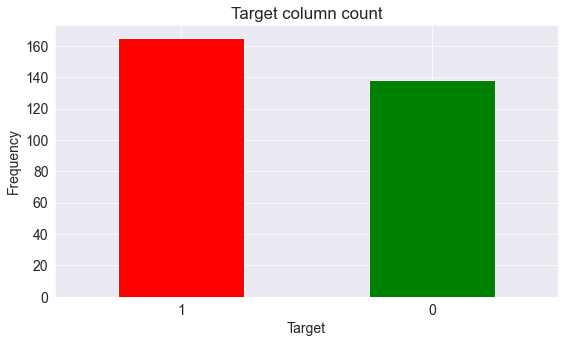

In [ ]:
df.target.value_counts().plot(kind = "bar", color = ["red", "green"])
plt.title("Target column count")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Analyze and compare columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


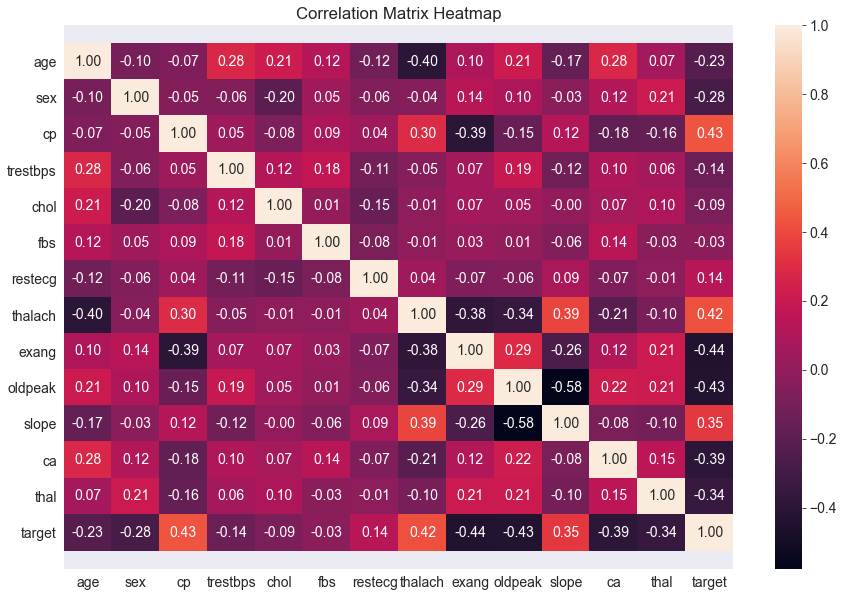

In [ ]:
# Correlation Matrix using Seaborn's Heatmap
correlationMatrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(correlationMatrix, annot = True, fmt = ".2f")

# Center Numbers
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

Negative correlation between the target and exercise induced angina. When you exercise your heart requires more blood for oxygen flow. Narrow arteries limit blood flow.

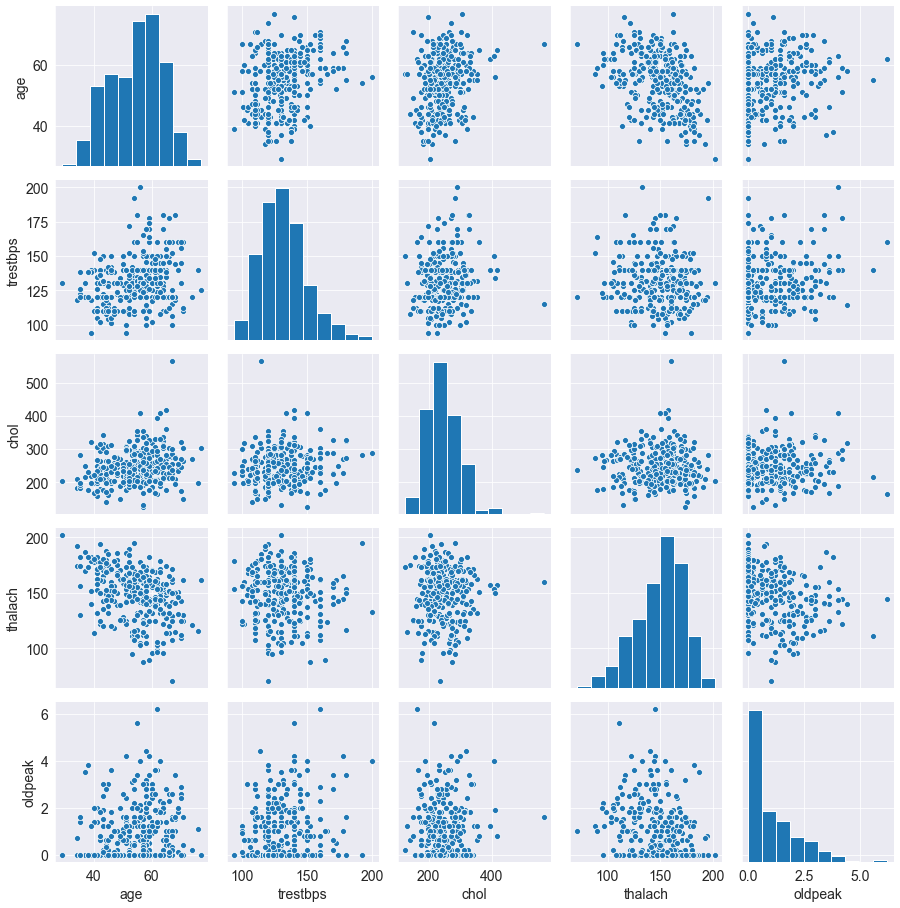

In [ ]:
# Correlation between continuous features
subset = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subset)

plt.show()

From here we can see a positive correlation between chest pain and the target. Let's further explore this.

### Chest Pain Types
The most severe type related to the heart is the typical angina. Let's visualize the frequency 

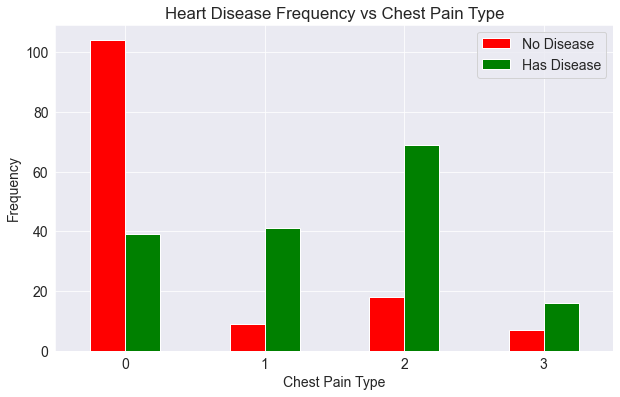

In [ ]:
# Crosstab plot
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6), color = ["red", "green"])

plt.title("Heart Disease Frequency vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Has Disease"])
plt.show()

More pain results in a greater chance of heart disease.

### Max Heart Rate and Age
Common indications circulating heart disease are heart rate increase and age. Are they related based on this dataset?

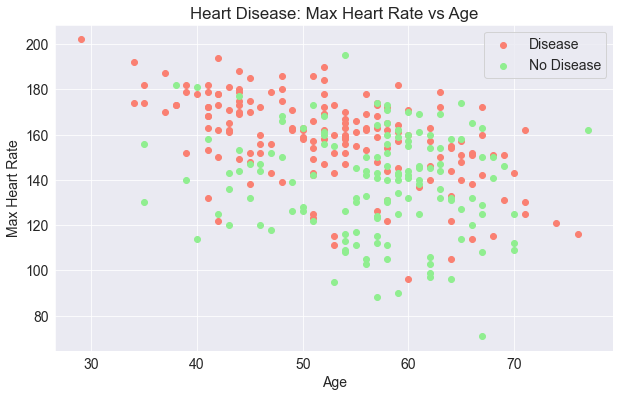

In [ ]:
#Figure initialization
plt.figure(figsize = (10,6))

#Scatter plot for positive and negative
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = "salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = "lightgreen")

plt.title("Heart Disease: Max Heart Rate vs Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

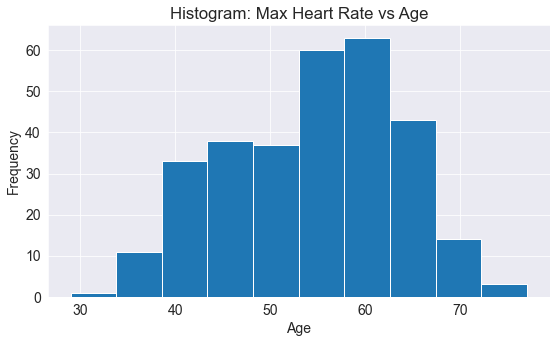

In [ ]:
#Histogram showing distribution
df.age.plot.hist()
plt.xlabel("Age")
plt.title("Histogram: Max Heart Rate vs Age")
plt.show()

### Heart Diease and Gender
Based on the correlation matrix, it appears that along the gender feature, the strongest correlation is with having hearth disease comapared to a particular medical attribute.

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are a lot more males in this dataset so we need to proceed carefully. 

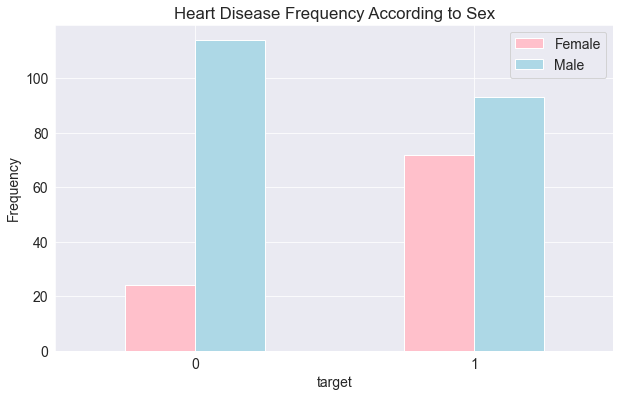

In [ ]:
# Crosstab plot
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ["pink", "lightblue"])

plt.xticks(rotation = 0)
plt.ylabel("Frequency")
plt.title("Heart Disease Frequency According to Sex")
plt.legend(["Female", "Male"])
plt.show()

I don't even have to create the crosstab matrix but I can already tell that something is wrong here. Why would women be more likely to have heart disease then men? Of course, the number of data points really affect the thoughts that come from this plot. Hopefully, the model shows that there is no correlation.

## Modeling

In [ ]:
# Split features and target columns
X = df.drop("target", axis = 1)
y = df.target

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Split train test data, 80/20
from sklearn.model_selection import train_test_split

# Store for replication in testing and tuning or for viewers
#np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2


In [ ]:
y_train

200    0
214    0
197    0
207    0
279    0
      ..
154    1
171    0
56     1
42     1
126    1
Name: target, Length: 242, dtype: int64

In [ ]:
# Import sklearn tools for model instantiation and scoring
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# Pipeline to fit and score models

# Model dictionary
models = {"Logitstic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "KNN": KNeighborsClassifier()}

def fitScore (models, X_train, X_test, y_train, y_test):
    """
    Takes in a dictionary of models to fit and score
    """
    # Random seed from before
    # np.random.seed(7)
    
    # Score dictionary
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        scores[name] = model.score(X_test,y_test)
    return scores    

In [ ]:
modelScores = fitScore(models = models, X_train = X_train, X_test = X_test, y_train = y_train,
y_test = y_test)

modelScores

C:\Users\brian\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logitstic Regression': 0.8688524590163934,
 'Random Forest': 0.819672131147541,
 'KNN': 0.639344262295082}

## Baseline Model Comparison

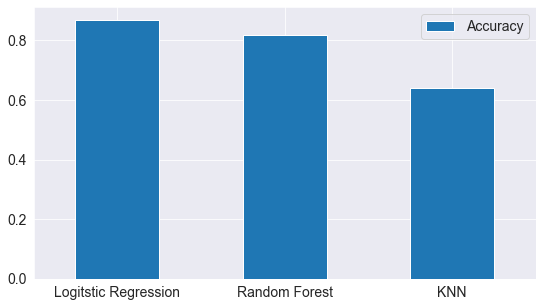

In [ ]:
comparison = pd.DataFrame(modelScores, index = ["Accuracy"])
comparison.T.plot.bar()

plt.xticks(rotation = 0)
plt.show()

## Hyperparamter Tuning
Hyperparemeters are model specific settings that are fixed to build a more accurate model

In [ ]:
# KNN is the worst of the three

# Initalize new tuning scores
trainingScores = []
testingScores = []

# Instantiate model and create K list
KNN = KNeighborsClassifier()
neighbors = range(1,41)

for i in neighbors:
    KNN.set_params(n_neighbors = i)
    KNN.fit(X_train, y_train)
    trainingScores.append(KNN.score(X_train, y_train))
    testingScores.append(KNN.score(X_test, y_test))

In [ ]:
trainingScores

[1.0,
 0.7975206611570248,
 0.7768595041322314,
 0.756198347107438,
 0.768595041322314,
 0.7396694214876033,
 0.7231404958677686,
 0.6652892561983471,
 0.6859504132231405,
 0.6983471074380165,
 0.6818181818181818,
 0.6859504132231405,
 0.7024793388429752,
 0.6859504132231405,
 0.6900826446280992,
 0.6983471074380165,
 0.6735537190082644,
 0.6942148760330579,
 0.6776859504132231,
 0.6942148760330579,
 0.6776859504132231,
 0.6776859504132231,
 0.6900826446280992,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.6942148760330579,
 0.6859504132231405,
 0.6900826446280992,
 0.6900826446280992,
 0.6983471074380165,
 0.6900826446280992,
 0.6776859504132231,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6818181818181818,
 0.6859504132231405,
 0.6694214876033058,
 0.6859504132231405]

In [ ]:
testingScores

[0.5573770491803278,
 0.5573770491803278,
 0.6885245901639344,
 0.639344262295082,
 0.639344262295082,
 0.5573770491803278,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377,
 0.6885245901639344]

Maximum KNN score on the test data: 75.41%


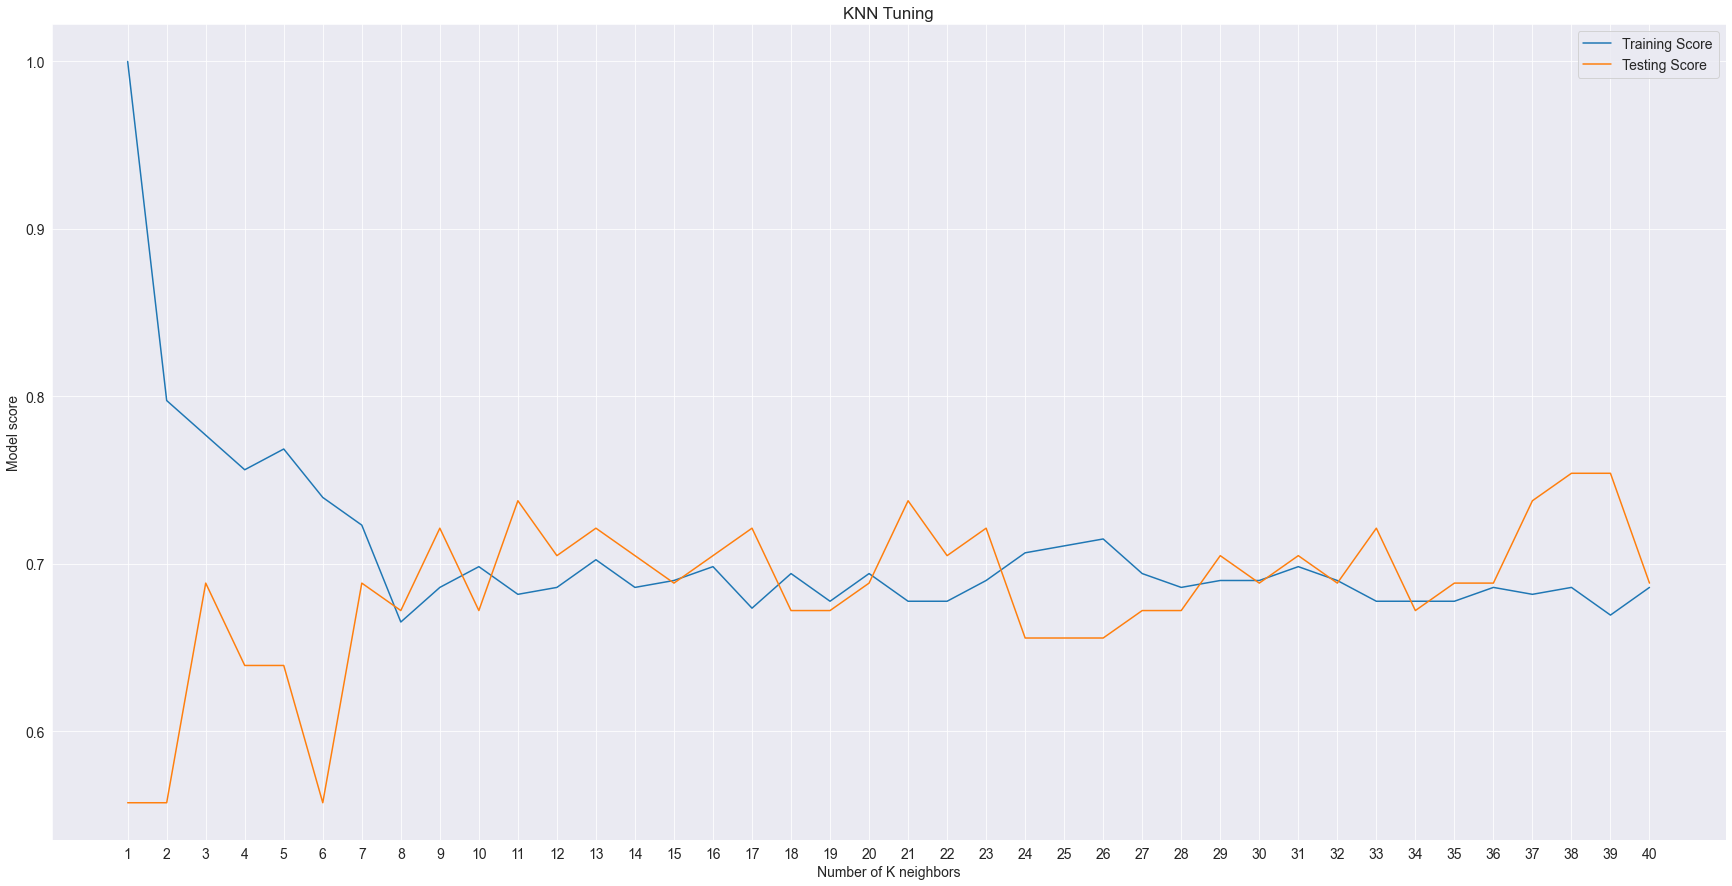

In [ ]:
plt.figure(figsize = (30,15))
plt.plot(neighbors, trainingScores, label = "Training Score")
plt.plot(neighbors, testingScores, label = "Testing Score")
plt.xticks(np.arange(1,41,1))
plt.title("KNN Tuning")
plt.xlabel("Number of K neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(testingScores)*100:.2f}%")

Peak score at around K = 26

### RandomizedSearchCV

RandomSearchCV checks random combinations based on an n value which is good for larger sets of data. Works with logistic regression and random forest classification

In [ ]:
#Logistic Regression
logisticregressionGrid = {"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

In [ ]:
# Setup random hyperparameter search for LogisticRegression
rs_logisticregression = RandomizedSearchCV(LogisticRegression(), param_distributions = logisticregressionGrid, cv=5,
verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_logisticregression.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_logisticregression.best_params_

{'solver': 'liblinear', 'C': 3792.690190732246}

In [ ]:
rs_logisticregression.score(X_test, y_test)

0.7868852459016393

In [ ]:
#Random Forest
randomforestGrid = {"n_estimators": np.arange(10,1000,50),
                   "max_depth": [None, 3, 5, 10],
                   "min_samples_split": np.arange(2, 20, 2),
                   "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random hyperparameter search for RandomForestClassifier
rs_randomforest = RandomizedSearchCV(RandomForestClassifier(), param_distributions = randomforestGrid,
cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_randomforest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_randomforest.best_params_

{'n_estimators': 660,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_randomforest.score(X_test, y_test)

0.8852459016393442

### GridSearchCV

GridSearchCV is better for fewer rows of data. The Logistic Regression model is better so let's stick with it.

In [ ]:
# Different hyperparameters for our LogisticRegression model
logisticregressionGrid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_logisticregression = GridSearchCV(LogisticRegression(), param_grid = logisticregressionGrid,
cv = 5, verbose = True)

# Fit grid hyperparameter search model
gs_logisticregression.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [ ]:
gs_logisticregression.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [ ]:
gs_logisticregression.score(X_test, y_test)

0.7868852459016393

## Evaluating tuned model 

Get an ROC, AUC and confusion matrix

In [ ]:
# Make predictions with tuned model
y_preds = gs_logisticregression.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [ ]:
y_test

163    1
96     1
146    1
284    0
222    0
      ..
232    0
0      1
210    0
270    0
19     1
Name: target, Length: 61, dtype: int64

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.83      0.81      0.82        37

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



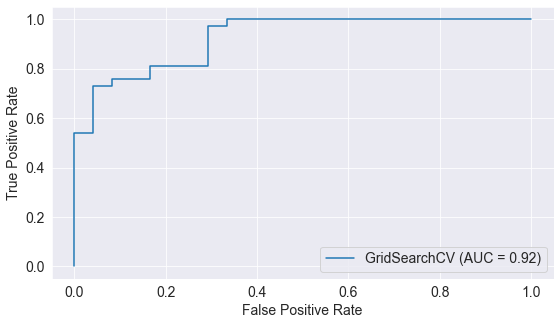

In [ ]:
plot_roc_curve(gs_logisticregression, X_test, y_test)
plt.show()

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18  6]
 [ 7 30]]


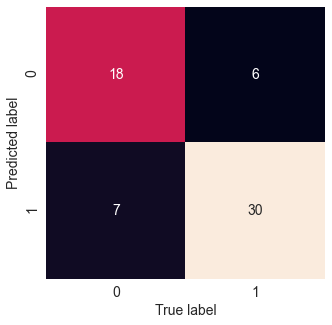

In [ ]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    
plot_conf_mat(y_test, y_preds)

### Cross Validation Evaluation

In [ ]:
# Check best hyperparameters
gs_logisticregression.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters
classifier = LogisticRegression(C = 0.38566204211634725, solver = "liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(classifier, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(classifier, X, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(classifier, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(classifier, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

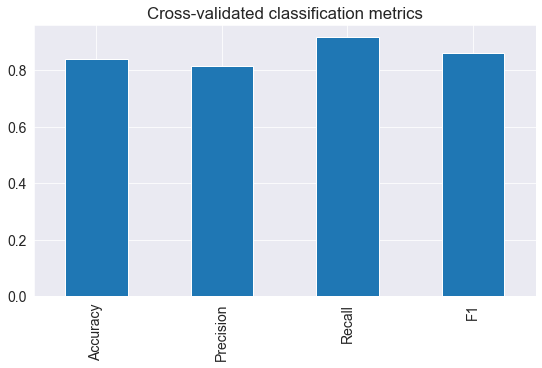

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [ ]:
clf.coef_

array([[ 0.01777846, -0.78572535,  0.68782627, -0.01922479, -0.00268244,
        -0.00484793,  0.19129283,  0.02491546, -0.56382438, -0.41511939,
         0.39918006, -0.65720802, -0.5154145 ]])

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.017778455217306324,
 'sex': -0.7857253457894233,
 'cp': 0.6878262733975106,
 'trestbps': -0.019224785543898847,
 'chol': -0.002682444111385916,
 'fbs': -0.004847929220261263,
 'restecg': 0.1912928287024039,
 'thalach': 0.024915463379739922,
 'exang': -0.5638243848720539,
 'oldpeak': -0.4151193883029477,
 'slope': 0.3991800615038388,
 'ca': -0.6572080214460105,
 'thal': -0.5154144985100712}

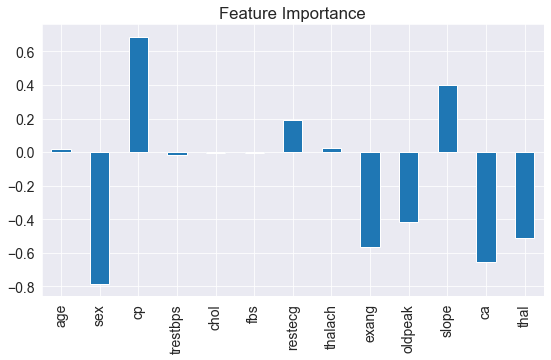

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

Thank goodness! The model shows negative correlation between gender and the target. Also slope makes sense. But wait, near 0 for cholesterol? 